In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [6]:
mil_equip = pd.read_csv('../data/mil_equipment.csv')
total_equip = pd.read_csv('../data/total_equipment.csv')

In [11]:
mil_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13929 entries, 0 to 13928
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               13929 non-null  object 
 1   County              13929 non-null  object 
 2   Ship Date           13929 non-null  object 
 3   Mil Equip Quantity  13929 non-null  int64  
 4   Total Mil Cost      13929 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 544.2+ KB


In [13]:
#Change Ship Date to Datetime
mil_equip['Ship Date'] = pd.to_datetime(mil_equip['Ship Date'], format='mixed')
total_equip['Ship Date'] = pd.to_datetime(total_equip['Ship Date'], format='mixed')

In [14]:
#Create Year Columns
mil_equip['Year'] = mil_equip['Ship Date'].dt.year
total_equip['Year'] = total_equip['Ship Date'].dt.year

In [15]:
mil_year = mil_equip.groupby('Year').count()
mil_year = mil_year.reset_index()
mil_year

,Year,State,County,Ship Date,Mil Equip Quantity,Total Mil Cost
0,2006,2943,2943,2943,2943,2943
1,2007,880,880,880,880,880
2,2008,1443,1443,1443,1443,1443
3,2009,482,482,482,482,482
4,2010,910,910,910,910,910
5,2011,1741,1741,1741,1741,1741
6,2012,3047,3047,3047,3047,3047
7,2013,1863,1863,1863,1863,1863
8,2014,620,620,620,620,620


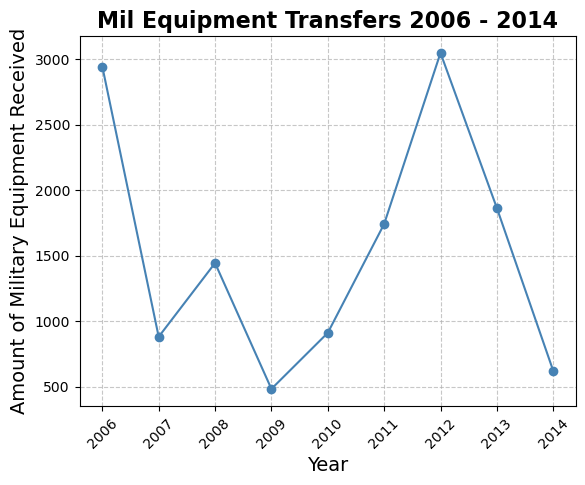

In [16]:
plt.plot(mil_year['Year'], mil_year['Mil Equip Quantity'], marker='o', color='steelblue', linestyle='-')

# Add labels and title
plt.title('Mil Equipment Transfers 2006 - 2014', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of Military Equipment Received', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(mil_year['Year'].astype(int))
plt.grid(True, linestyle='--', alpha=0.7)
# Show plot
plt.grid(True)
plt.show()

In [17]:
total_year = total_equip.groupby('Year').count()
total_year = total_year.reset_index()
total_year

,Year,State,County,Ship Date,Total Equip Quantity,Total Cost
0,2006,3117,3117,3117,3117,3117
1,2007,990,990,990,990,990
2,2008,1645,1645,1645,1645,1645
3,2009,2025,2025,2025,2025,2025
4,2010,2640,2640,2640,2640,2640
5,2011,4995,4995,4995,4995,4995
6,2012,17222,17222,17222,17222,17222
7,2013,12462,12462,12462,12462,12462
8,2014,4605,4605,4605,4605,4605


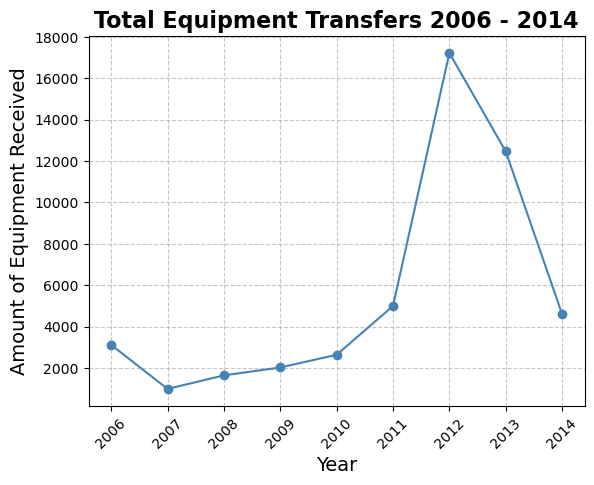

In [19]:
plt.plot(total_year['Year'], total_year['Total Equip Quantity'], marker='o', color='steelblue', linestyle='-')
# Add labels and title
plt.title('Total Equipment Transfers 2006 - 2014', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of Equipment Received', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(total_year['Year'].astype(int))
plt.grid(True, linestyle='--', alpha=0.7)
# Show plot
plt.grid(True)
plt.show()

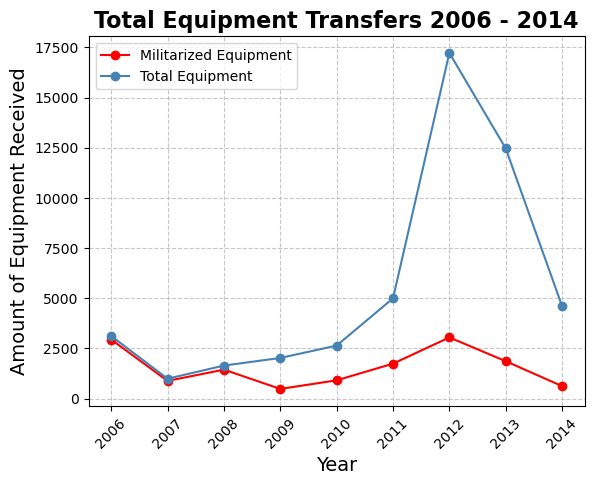

In [22]:
#Plotting Both
plt.plot(mil_year['Year'], mil_year['Mil Equip Quantity'], marker='o', color='red', linestyle='-', label='Militarized Equipment')
plt.plot(total_year['Year'], total_year['Total Equip Quantity'], marker='o', color='steelblue', linestyle='-', label='Total Equipment')
# Add labels and title
plt.title('Total Equipment Transfers 2006 - 2014', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of Equipment Received', fontsize=14)
plt.xticks(rotation=45)
#plt.xticks(total_year['Year'].astype(int))
plt.grid(True, linestyle='--', alpha=0.7)
# Show plot
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#dfs with no year
total_equip_df = total_equip.drop(columns=['Year', 'Ship Date'])
mil_equip_df = mil_equip.drop(columns=['Year', 'Ship Date'])

In [29]:
#dfs with county groupby
total_equip_df = total_equip_df.groupby(['State', 'County']).sum()
total_equip_df = total_equip_df.reset_index()
mil_equip_df = mil_equip_df.groupby(['State', 'County']).sum()
mil_equip_df = mil_equip_df.reset_index()

In [30]:
equip_df = pd.merge(total_equip_df, mil_equip_df, on=['State', 'County'], how='outer')
equip_df.fillna(0, inplace=True)

In [31]:
equip_df.head(20)

,State,County,Total Equip Quantity,Total Cost,Mil Equip Quantity,Total Mil Cost
0,AK,ANCHORAGE,1063,636550.09,130.0,521602.23
1,AK,BETHEL,2,0.00,0.0,0.00
2,AK,FAIRBANKS NORTH STAR,18,26624.67,15.0,7485.00
3,AK,JUNEAU,14,5542.00,14.0,5542.00
4,AK,KETCHIKAN GATEWAY,4,1996.00,4.0,1996.00
5,AK,KODIAK ISLAND,5,690.00,5.0,690.00
6,AK,MATANUSKA SUSITNA,4,552.00,4.0,552.00
7,AL,AUTAUGA,111,177423.83,7.0,161125.00
8,AL,BALDWIN,738,453213.45,90.0,233819.86
9,AL,BARBOUR,48,111230.00,14.0,104012.00


In [32]:
equip_df['County'] = equip_df['County'].str.replace("SAINT", "ST")
equip_df['County'] = equip_df['County'].str.replace('-', ' ')
equip_df['County'] = equip_df['County'].str.replace('DEKALB', 'DE KALB')
equip_df['County'] = equip_df['County'].str.replace('DEWITT', 'DE WITT')
equip_df['County'] = equip_df['County'].str.replace('DUPAGE', 'DU PAGE')
equip_df['County'] = equip_df['County'].str.replace('DESOTO', 'DE SOTO')
equip_df['County'] = equip_df['County'].str.replace('VIRGINIA BEACH CITY', 'VIRGINIA BEACH')

In [33]:
#equip_df.to_csv('merged_equipment.csv', index=False)

In [40]:
#Fatalities By State
state_count = mil_equip.groupby('State').sum(numeric_only=True)
state_df = state_count.reset_index()
state_df = state_df.sort_values(by='Mil Equip Quantity', ascending=False)
state_df

#states with Over 500 Fatalities
top_states = state_df[state_df['Mil Equip Quantity'] > 1000]

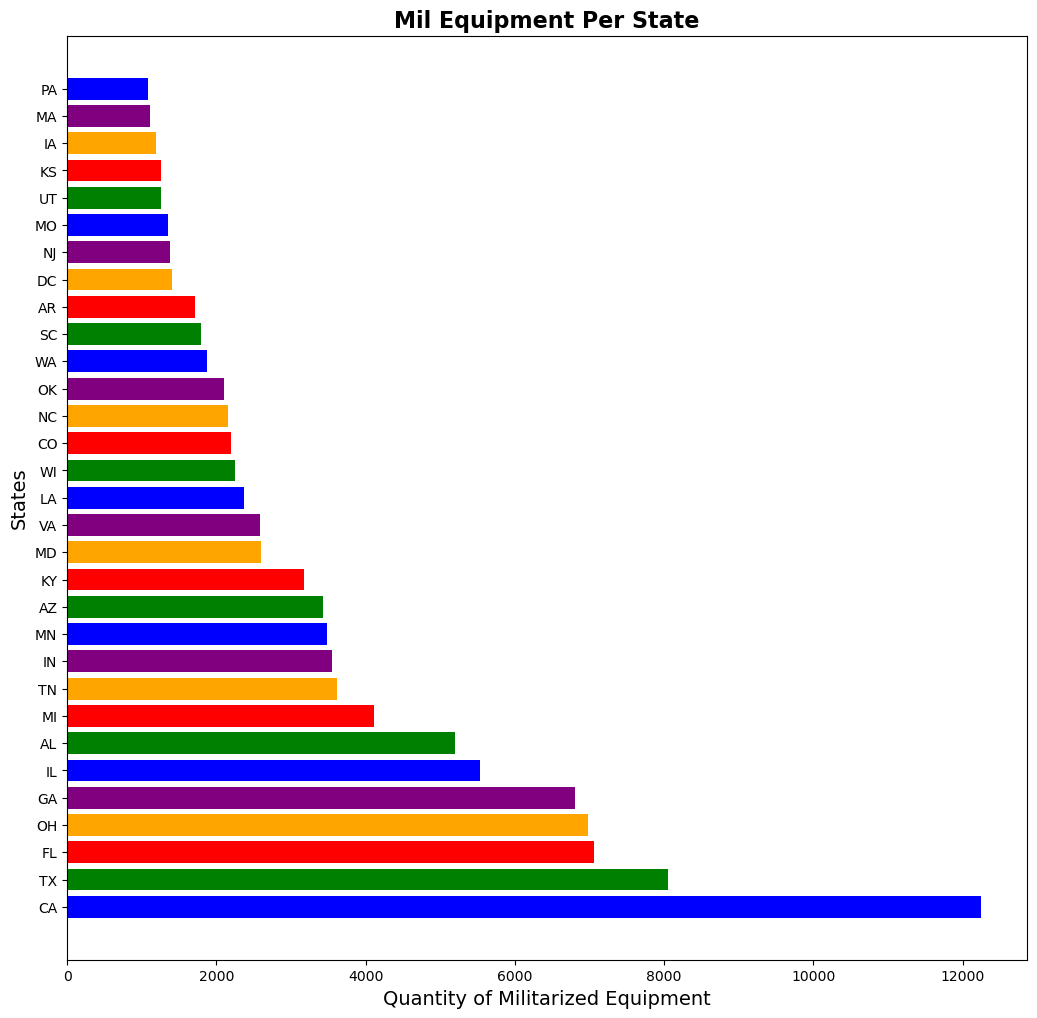

In [42]:
# Plot horizontal bar chart
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure(figsize=(16, 12))
plt.barh(top_states['State'], top_states['Mil Equip Quantity'], color=colors)

# Add labels and title
plt.xlabel('Quantity of Militarized Equipment', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('Mil Equipment Per State', fontsize=16, fontweight='bold')


# Set spacing between y-axis ticks
plt.yticks(fontsize=10)  # Adjust font size for state labels
plt.subplots_adjust(left=0.3)  # Adjust left margin to make space for longer state names

# Show plot
plt.show()

In [ ]:
#Equipment By County
county_count = mil_equip.groupby(['State', 'County']).count()
county_df = county_count.reset_index()
county_df = county_df.sort_values(by='Unique ID', ascending=False)


county_df['County_State'] = county_df['County'] + ', ' + county_df['State']
county_df.head()

#Counties and States with Over 500 Fatalities
top_counties = county_df.iloc[:16]
top_counties